In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando o arquivo CSV em uma variável
df = pd.read_csv('/content/pizza_sales.csv')

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
#Verificando o número de linhas e colunas
df.shape

(48620, 12)

In [5]:
#Verificando o tipo de dados em cada coluna
df.dtypes

pizza_id             float64
order_id             float64
pizza_name_id         object
quantity             float64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [6]:
#Renomeando as colunas
df = df.rename(columns= {
    'order_id' : 'pedido_id',
    'pizza_name_id' : 'pizza_nome_id',
    'quantity' : 'quantidade',
    'order_date' : 'data_pedido',
    'order_time' : 'horario_pedido',
    'unit_price' : 'preço_unitário',
    'total_price' : 'total_preço_pedido',
    'pizza_size' : 'tamanho_pizza',
    'pizza_category' : 'categoria_pizza',
    'pizza_ingredients' : 'ingredientes_pizza',
    'pizza_name' : 'nome_pizza'
})


In [7]:
#Verificando valores nulos
df.isnull().sum()

pizza_id              0
pedido_id             0
pizza_nome_id         0
quantidade            0
data_pedido           0
horario_pedido        0
preço_unitário        0
total_preço_pedido    0
tamanho_pizza         0
categoria_pizza       0
ingredientes_pizza    0
nome_pizza            0
dtype: int64

In [ ]:
#Removendo linhas com valores nulos, no nosso caso, apenas uma linha será removida
df= df.dropna(axis= 0)

In [ ]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
#Ranking de sabores mais vendidos
df.groupby('nome_pizza')['quantidade'].sum().sort_values(ascending= False)

nome_pizza
The Classic Deluxe Pizza                      2453.0
The Barbecue Chicken Pizza                    2432.0
The Hawaiian Pizza                            2422.0
The Pepperoni Pizza                           2418.0
The Thai Chicken Pizza                        2371.0
The California Chicken Pizza                  2370.0
The Sicilian Pizza                            1938.0
The Spicy Italian Pizza                       1924.0
The Southwest Chicken Pizza                   1917.0
The Big Meat Pizza                            1914.0
The Four Cheese Pizza                         1902.0
The Italian Supreme Pizza                     1884.0
The Vegetables + Vegetables Pizza             1526.0
The Mexicana Pizza                            1484.0
The Napolitana Pizza                          1464.0
The Prosciutto and Arugula Pizza              1457.0
The Spinach and Feta Pizza                    1446.0
The Pepper Salami Pizza                       1446.0
The Italian Capocollo Pizza        

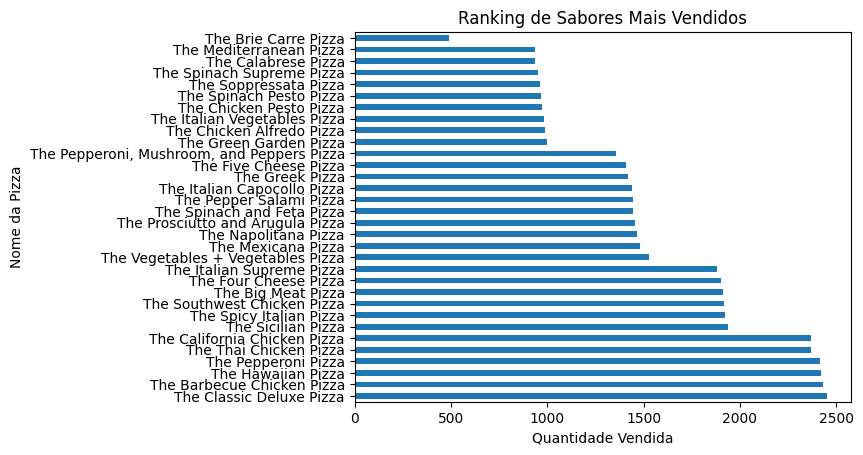

In [9]:
ranking_sabores_mais_vendidos= df.groupby('nome_pizza')['quantidade'].sum().sort_values(ascending= False)
ranking_sabores_mais_vendidos.plot.barh()
plt.xlabel('Quantidade Vendida')
plt.ylabel('Nome da Pizza')
plt.title('Ranking de Sabores Mais Vendidos')
plt.show()


In [10]:
#Verificando qual o tamanho de pizza favorita dos clientes
ranking_tamanhos_mais_vendidos= df.groupby('tamanho_pizza')['quantidade'].sum()
print(ranking_tamanhos_mais_vendidos)

tamanho_pizza
L      18956.0
M      15635.0
S      14403.0
XL       552.0
XXL       28.0
Name: quantidade, dtype: float64


In [11]:
tamanho_mais_vendido= df.groupby('tamanho_pizza')['quantidade'].sum().idxmax()
print('Nota_se que os clientes preferem a', tamanho_mais_vendido)

Nota_se que os clientes preferem a L


<Axes: xlabel='tamanho_pizza'>

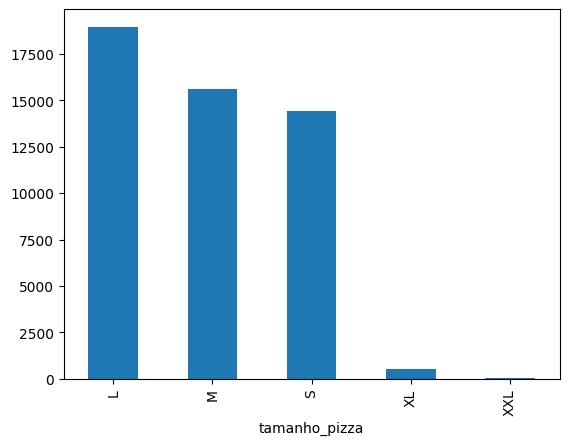

In [12]:
ranking_tamanhos_mais_vendidos.plot.bar()

In [13]:
#Categorias de pizzas vendidas
df['categoria_pizza'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [14]:
ranking_categoria_mais_vendida= df.groupby('categoria_pizza')['quantidade'].sum().sort_values(ascending= False)
print(ranking_categoria_mais_vendida)

categoria_pizza
Classic    14888.0
Supreme    11987.0
Veggie     11649.0
Chicken    11050.0
Name: quantidade, dtype: float64


In [15]:
import plotly.graph_objects as go

In [16]:
go.Figure(
    go.Pie(
        labels= ranking_categoria_mais_vendida.index,
        values= ranking_categoria_mais_vendida
    )

)

In [17]:
#Convertendo a coluna data do pedido para datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'])

<ipython-input-17-8bc7c4c47a4b>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [18]:
df.dtypes

pizza_id                     float64
pedido_id                    float64
pizza_nome_id                 object
quantidade                   float64
data_pedido           datetime64[ns]
horario_pedido                object
preço_unitário               float64
total_preço_pedido           float64
tamanho_pizza                 object
categoria_pizza               object
ingredientes_pizza            object
nome_pizza                    object
dtype: object

In [19]:
df.sample(5)

,pizza_id,pedido_id,pizza_nome_id,quantidade,data_pedido,horario_pedido,preço_unitário,total_preço_pedido,tamanho_pizza,categoria_pizza,ingredientes_pizza,nome_pizza
12889,12890.0,5653.0,ital_cpcllo_l,1.0,2015-05-04,17:07:51,20.50,20.50,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
42281,42282.0,18600.0,the_greek_l,1.0,2015-11-13,18:36:46,20.50,20.50,L,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
18673,18674.0,8204.0,spinach_fet_m,1.0,2015-05-17,19:08:05,16.00,16.00,M,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",The Spinach and Feta Pizza
18963,18964.0,8328.0,ital_supr_m,1.0,2015-05-20,12:19:17,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
38227,38228.0,16862.0,spinach_supr_l,1.0,2015-10-13,18:02:40,20.75,20.75,L,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti...",The Spinach Supreme Pizza


In [20]:
df['dia_venda'] = df['data_pedido'].dt.day
df['mês_venda'] = df['data_pedido'].dt.month
df['ano_venda'] = df['data_pedido'].dt.year


In [21]:
df.head(10)

,pizza_id,pedido_id,pizza_nome_id,quantidade,data_pedido,horario_pedido,preço_unitário,total_preço_pedido,tamanho_pizza,categoria_pizza,ingredientes_pizza,nome_pizza,dia_venda,mês_venda,ano_venda
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,1,2015
5,6.0,2.0,thai_ckn_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,1,1,2015
6,7.0,3.0,ital_supr_m,1.0,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015
7,8.0,3.0,prsc_argla_l,1.0,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,1,1,2015
8,9.0,4.0,ital_supr_m,1.0,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015
9,10.0,5.0,ital_supr_m,1.0,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,1,2015


In [22]:
#Ranking de vendas por mês
ranking_mes_vendas= df.groupby('mês_venda')['pedido_id'].nunique()
print(ranking_mes_vendas.sort_values(ascending= False))

mês_venda
1     1929
3     1864
7     1860
11    1844
8     1835
4     1829
10    1782
6     1771
5     1765
2     1648
9     1638
12    1585
Name: pedido_id, dtype: int64


<Axes: xlabel='mês_venda'>

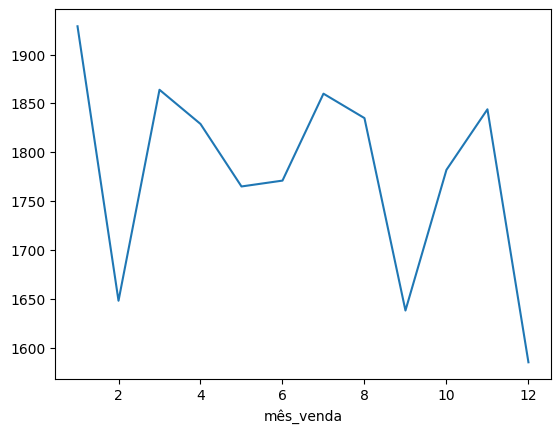

In [23]:
ranking_mes_vendas.plot.line()

In [38]:
#Analisando o mês de janeiro, que foi o mês com maior volume de venda
janeiro= df[df['mês_venda']==1]
janeiro.head(3)

,pizza_id,pedido_id,pizza_nome_id,quantidade,data_pedido,horario_pedido,preço_unitário,total_preço_pedido,tamanho_pizza,categoria_pizza,ingredientes_pizza,nome_pizza,dia_venda,mês_venda,ano_venda,dia_mês_extenso
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,Thursday
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,Thursday
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,1,2015,Thursday


In [35]:
df['dia_mês_extenso'] = df['data_pedido'].dt.strftime('%A')

In [36]:
df.head(2)

,pizza_id,pedido_id,pizza_nome_id,quantidade,data_pedido,horario_pedido,preço_unitário,total_preço_pedido,tamanho_pizza,categoria_pizza,ingredientes_pizza,nome_pizza,dia_venda,mês_venda,ano_venda,dia_mês_extenso
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,Thursday
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,Thursday


In [39]:
janeiro.head(2)

,pizza_id,pedido_id,pizza_nome_id,quantidade,data_pedido,horario_pedido,preço_unitário,total_preço_pedido,tamanho_pizza,categoria_pizza,ingredientes_pizza,nome_pizza,dia_venda,mês_venda,ano_venda,dia_mês_extenso
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,1,2015,Thursday
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,1,2015,Thursday


In [42]:
#Analisando e rankeando a venda de pizza por dia da semana
df.groupby('dia_mês_extenso')['pedido_id'].nunique().sort_values(ascending= False)

dia_mês_extenso
Friday       3359
Thursday     3173
Saturday     3126
Wednesday    3064
Tuesday      2978
Monday       2940
Sunday       2710
Name: pedido_id, dtype: int64

In [45]:
df['pizza_id'] = df['pizza_id'].astype(str)
df['pedido_id'] = df['pedido_id'].astype(str)
df['dia_venda'] = df['dia_venda'].astype(str)
df['mês_venda'] = df['mês_venda'].astype(str)
df['ano_venda'] = df['ano_venda'].astype(str)

In [46]:
df.describe()

,quantidade,preço_unitário,total_preço_pedido
count,48620.000000,48620.000000,48620.000000
mean,1.019622,16.494132,16.821474
std,0.143077,3.621789,4.437398
min,1.000000,9.750000,9.750000
25%,1.000000,12.750000,12.750000
50%,1.000000,16.500000,16.500000
75%,1.000000,20.250000,20.500000
max,4.000000,35.950000,83.000000


<Axes: xlabel='preço_unitário'>

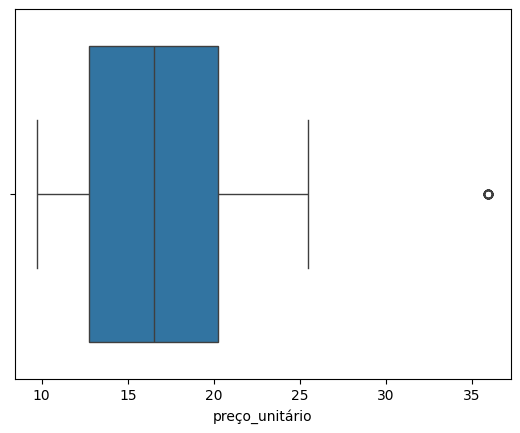

In [48]:
#Criando um boxplot para análise do preço unitário da pizza
sns.boxplot(data=df, x= 'preço_unitário')